<center>
<h1 class="title">Capital Bikeshare Prediction</h1>
<h2>Stat 504 Final Project</h2>
<div>
    <img class="logo" src="http://developer.motivateco.com/images/cabi.png" height=100 />
</div>
</center>

<center>
<h2>Ensheng Dong</h2>
<h3>December 2015</h3>
</center>

# Capital Bikeshare Prediction

(For a better presentation, please download and open this file in a local machine.)

# Abstract

Many large cities around the world, such as Washington D.C., New York City, Melbourne, Paris, etc. are facing the problem of predicting the demand of bike-ride sharing systems. This project focuses on predicting the number of bike rentals for a city bikeshare system in Washington D.C., where riding bicycle is one of the most popular travel modes for local commuters and tourists. This project first examinzed the data from the UCI Machine Learning Repository (attached as bikeshare.csv), and then built different supervised machine learning models to make the best prediction. This project used the default mothod, the Root Mean Squared Logarithmic Error (RMSLE) method and the Root Mean Squared Error (RMSE) method to evaluate the model performace with 10-fold cross validation. In the end, a summary about 10-CV accuracy, running time, and best hyper-parameters were compared (attached as summary.csv). This project found that random forest model performed better based on this bikeshare data.

# Environment

Amazon Web Services (AWS) with 2.40 GHz CPU and 32.0 GB Memory.

# Background
<center>
<div>
    <img class="logo" src="http://thecityfix.com/files/2011/07/Capital-Bikeshare-National-Mall.jpg" height=100 />
</div>
</center>

# Background
* Capital Bikeshare puts over 3000 bicycles and over 350 stations across Washington, D.C., Arlington and Alexandria, VA and Montgomery County, MD.
* 24 hours a day, 365 days a year.
* Fee: The first 30 minutes of each trip are free. Each additional 30 minutes incurs an additional fee.
* There are over 500 bike-sharing programs around the world.
* They provided a data base!

# Goals

The goal of this projectis to predict the total rental demand in the Capital Bikeshare program in Washington D.C..

# Data Source

* [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#)
* Capital bikeshare [System Data](http://www.capitalbikeshare.com/system-data)
* [Weather Information](http://www.freemeteo.com )
* [Holiday Schedule](http://dchr.dc.gov/page/holiday-schedule)
* [Bike Share Data Systems](https://github.com/BetaNYC/Bike-Share-Data-Best-Practices/wiki/Bike-Share-Data-Systems)

# Orignal Data

* The raw training data consists of 10886 observations. This data represents the first 20 days of each month for a 2 year period.
* Each training sample consists of 12 data features: date and hour, season, holiday, working-day, weather, temp, atemp, humidity, wind speed, casual, registered, and count.
* Date and hour are provided as a single string. 
* Weather is a categorical variable with 4 levels representing different weather conditions.
* Holiday is a binary indicator variable representing whether the particular day was a holiday.
* Working-day is a binary indicator variable signifying whether the day was a non-holiday weekday. 
* Casual and registered represent the number of bike rentals made by non-registered and registered users. 
* Count is the sum of casual and registered values and is the value that we seek to predict. 

# Data Handling

* Importing Data with Pandas
* Cleaning Data
* Exploring Data through Visualizations with Seaborn
* Supervised Machine Learning
* Feature Selection
* Feature Importance
* Summary

# Data Analysis

* Supervised Machine learning Techniques (tuning hyper-parameters):
    * KNN (n_neighbors)
    * Logistic Regression (C)
    * Classification Tree (max_depth)
    * Bagging (n_neighbors)
    * Random forest (n_estimators)
    * Boosted trees (n_estimators)
    * Note: all models are tested with both all factors and selected factors.

* Evaluation of the Analysis
    * 10-fold cross validation with the default evaluation method (scoring='accuracy')
    * Root Mean Squared Error (RMSE) (scoring=rmse_score)
    $$\sqrt{\frac{1}{n}\sum_{i=1}^n(p_{i}-a_{i})^{2}}$$
        where
        * n is the number of hours in the test set
        * p_i is your predicted count
        * a_i is the actual count
    * Root Mean Squared Logarithmic Error (RMSLE) (scoring=score)
    $$\sqrt{\frac{1}{n}\sum_{i=1}^n((\log_{}{p_{i}+1})-(\log_{}{a_{i}+1}))^{2}}$$
        where
        * n is the number of hours in the test set
        * p_i is your predicted count
        * a_i is the actual count
*  Note: Because the repsonse variable ('count') is continuous, we did not test Naive Bayes model, neither did the ROC/AUC evaluation.
* feature_selection: logistic regression & Lasso
* Feature importance

# Conclusion and Future Study

(In the end of this project)

# Required Libraries

* NumPy
* IPython
* Pandas
* SciKit-Learn
* SciPy
* Seaborn
* Graphlab
* Matplotlib, etc.

In [1]:
# import modules
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn import datasets
from sklearn.feature_selection import RFE
%matplotlib inline

## Data Handling

In [2]:
# read the crime data into a DataFrame
df = pd.read_csv('bikeshare.csv', header=0)
df.shape

(10886, 12)

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [4]:
df_time1 = df['datetime'].str[0:-8].str.split('-', return_type='frame').astype(str)
df_time1.columns = ['year', 'month', 'day']
df_time2 = df['datetime'].str[-8:].str.split(':', return_type='frame').astype(str)
df_time2.columns = ['hour', 'min', 'sec']
result = pd.concat([df,df_time1, df_time2], axis=1, join='inner')

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: the return_type='frame' keyword is deprecated, use expand=True instead
  if __name__ == '__main__':
C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: the return_type='frame' keyword is deprecated, use expand=True instead
  app.launch_new_instance()


In [5]:
# classify atemp to categorical data, noted as 1~5
result['feeltemp'] = pd.cut(df.atemp, 5, range(0, 50, 10), labels=["1","2","3","4","5"])
# convert "count" as binary variable
result.loc[:,('label')] = (result['count'] >= 100).astype(int)
# convert field type to float
result[['month', 'day', 'hour']] = result[['month', 'day', 'hour']].astype(float)
result.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,sec,feeltemp,label
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16,2011,1,1,0,00,00,2,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40,2011,1,1,1,00,00,2,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32,2011,1,1,2,00,00,2,0


In [6]:
# remove unnecessary or duplicate columns
# result = result.drop(['datetime','season','temp','year','min','sec'], axis=1)
# rearrange the column sequence
list(result.columns.values)
result = result[['label', 'count', 'casual', 'registered', 'month', 'day', 'hour', 'holiday', \
                 'workingday', 'weather', 'atemp', 'humidity', 'windspeed', 'feeltemp']]
df = result
df.head(3)

,label,count,casual,registered,month,day,hour,holiday,workingday,weather,atemp,humidity,windspeed,feeltemp
0,0,16,3,13,1,1,0,0,0,1,14.395,81,0,2
1,0,40,8,32,1,1,1,0,0,1,13.635,80,0,2
2,0,32,5,27,1,1,2,0,0,1,13.635,80,0,2


# Factors

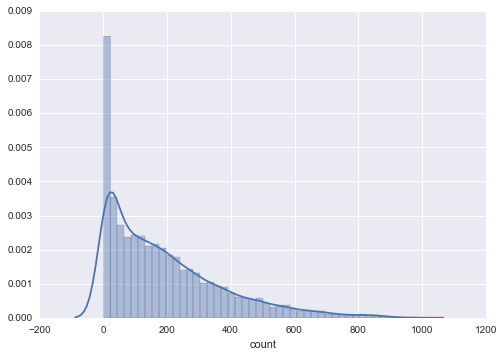

In [45]:
sns.distplot(result['count']);

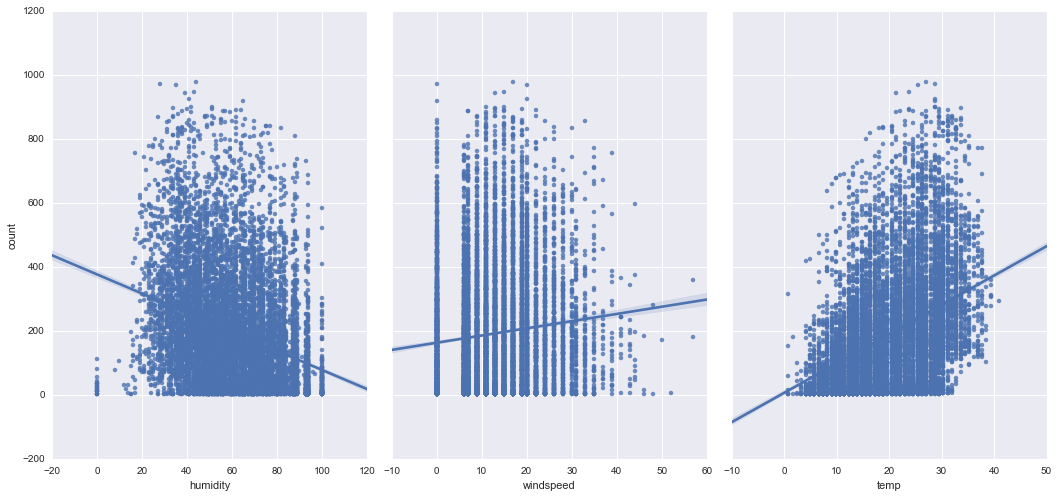

In [36]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(result, x_vars=['humidity','windspeed','temp'], y_vars='count', size=7, aspect=0.7, kind='reg')

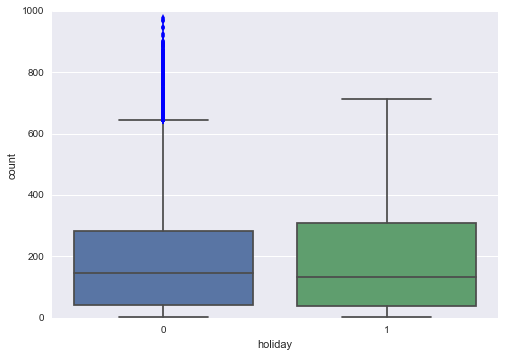

In [49]:
ax = sns.boxplot(x="holiday", y="count", data=result)

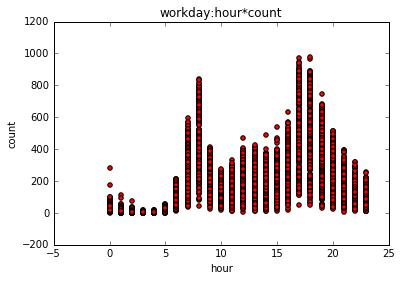

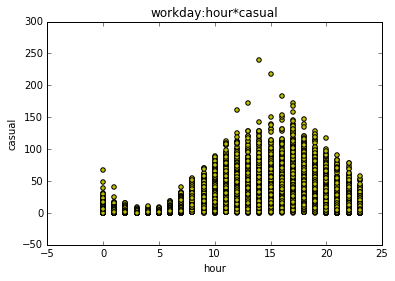

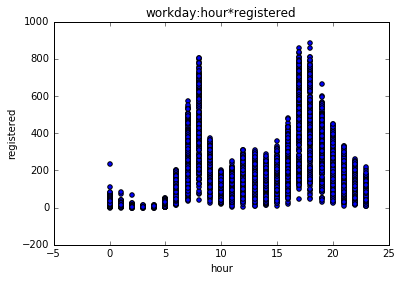

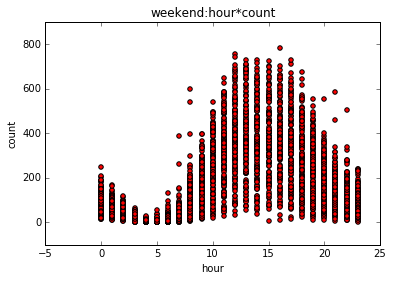

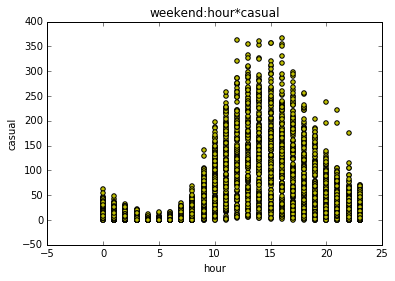

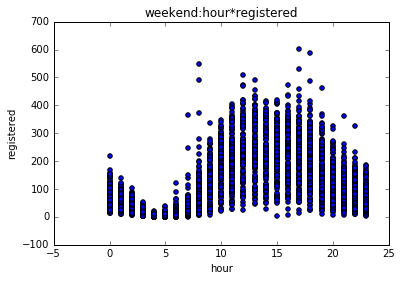

In [8]:
# workday hour distribution
result.loc[result['workingday'] == 1].plot(kind='scatter', x='hour', y='count',color='r').set_title('workday:hour*count');
result.loc[result['workingday'] == 1].plot(kind='scatter', x='hour', y='casual',color='y').set_title('workday:hour*casual');
result.loc[result['workingday'] == 1].plot(kind='scatter', x='hour', y='registered',color='b').set_title('workday:hour*registered');
# weekend hour distribution
result.loc[result['workingday'] == 0].plot(kind='scatter', x='hour', y='count',color='r').set_title('weekend:hour*count');
result.loc[result['workingday'] == 0].plot(kind='scatter', x='hour', y='casual',color='y').set_title('weekend:hour*casual');
result.loc[result['workingday'] == 0].plot(kind='scatter', x='hour', y='registered',color='b').set_title('weekend:hour*registered');

# Supervised Machine Learning (Full model)

In [8]:
df = df[['label','count', 'casual', 'registered', 'month', 'day', 'hour', 'weather', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed', 'feeltemp']]
# Use the selected features as the X
X = df.loc[:,"month":"windspeed"]
y = df["count"]
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# Define model evaluation rules 

In [9]:
# define model evaluation rules - RMSLE
from sklearn.metrics import fbeta_score, make_scorer
def my_custom_loss_func(ground_truth, predictions):
    return np.sqrt(metrics.mean_squared_error((np.log(ground_truth+1)),(np.log(predictions+1))))
score = make_scorer(my_custom_loss_func, greater_is_better=True)

In [10]:
# define model evaluation rules - RMSE
from sklearn.metrics import fbeta_score, make_scorer
def my_custom_loss_func(ground_truth, predictions):
    return metrics.mean_squared_error(ground_truth, predictions)**0.5
rmse_score = make_scorer(my_custom_loss_func, greater_is_better=True)

## Model hyper-parameters optimization

### tuning n_neighbor for KNN

Compare three different evaluation scores: accuracy, RMSLE, and RMSE. Each of them provides different best n_neighbors and 10 CV accuracy values.

#### use scoring method - 'accuracy'

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'n_neighbors': 1}
[ 0.01163542  0.00577201  0.00397141  0.0060241   0.0093633   0.00393314
  0.00632911  0.00672646  0.00603865  0.01026958]
0.00707330516259
[0.007073305162594158, 0.010012860554841079, 0.01102333272092596, 0.011390777144956826, 0.011941943781003123, 0.012309388205033989, 0.012860554841080287, 0.01276869373507257, 0.013227999265111152, 0.013411

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:417: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


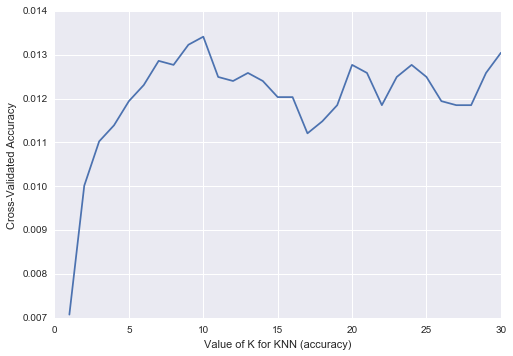

In [11]:
# use scoring method - 'accuracy'
start = time.time()
# define the parameter values that should be searched
knn = KNeighborsClassifier()
k_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN (accuracy)')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
knn_time = end - start
print "duration: %f" % (knn_time)

In [12]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.0134117214771
{'n_neighbors': 10}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=10, p=2, weights='uniform')


#### use scoring method - RMSLE

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'n_neighbors': 1}
[ 1.00113882  0.92640488  0.95003251  0.95804448  0.98324354  0.99784661
  1.03064634  1.11306274  1.11723699  1.26556036]
1.01854309084
[1.0185430908399262, 1.0937692085428061, 1.2194655883912786, 1.3290000428957216, 1.4111810550119386, 1.4768897239628058, 1.5310643158154018, 1.5659383957827391, 1.5966917354380408, 1.617

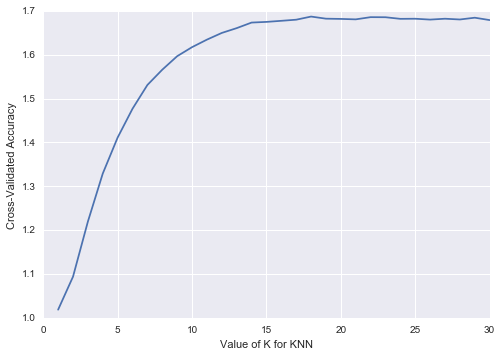

In [13]:
# use different scoring method - RMSLE
start = time.time()
# define the parameter values that should be searched
knn = KNeighborsClassifier()
k_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring=score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
knn_time = end - start
print "duration: %f" % (knn_time)

In [14]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

1.68708070825
{'n_neighbors': 18}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=18, p=2, weights='uniform')


#### scoring method - RMSE

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'n_neighbors': 1}
[ 191.96004116  169.20586307  159.0187769   144.07977925  140.98873039
  136.00636228  135.16904169  138.99930638  143.04114556  164.42496757]
154.937905481
[154.93790548091144, 141.89912610464108, 150.53686171539871, 158.55813345885619, 164.05366806746619, 168.90000035655018, 173.01840454452937, 176.2349902788134, 178.37

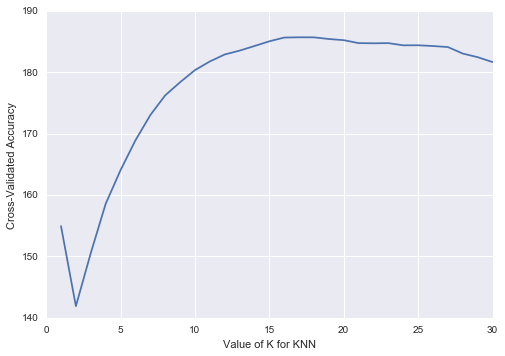

In [15]:
start = time.time()
# define the parameter values that should be searched
knn = KNeighborsClassifier()
k_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring=rmse_score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
knn_time = end - start
print "duration: %f" % (knn_time)

In [16]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

185.698687184
{'n_neighbors': 17}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=17, p=2, weights='uniform')


### tuning C for Logistic Regression

#### use scoring method - 'accuracy'

{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'C': 1}
[ 0.00775695  0.01298701  0.03097697  0.01204819  0.02059925  0.00688299
  0.00843882  0.02466368  0.03140097  0.01283697]
0.0163512768694
[0.016351276869373509, 0.015891971339334926, 0.015800110233327211, 0.015800110233327211, 0.015800110233327211, 0.01607569355135036, 0.01607569

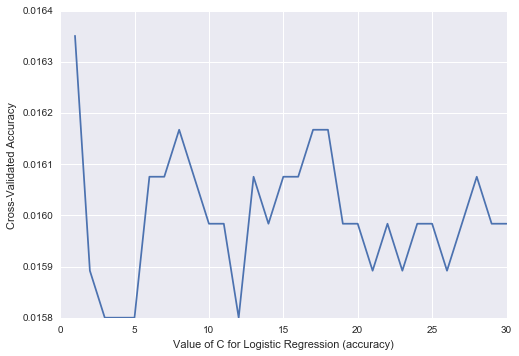

In [17]:
start = time.time()

model = LogisticRegression()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of C for Logistic Regression (accuracy)')
plt.ylabel('Cross-Validated Accuracy')

end = time.time()
logi_time = end - start
print "duration: %f" % (logi_time)

In [18]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.0163512768694
{'C': 1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)


#### use scoring method - RMSLE

{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'C': 1}
[ 1.99164628  1.85285458  1.77117292  1.7014149   1.68474526  1.62329532
  1.76795961  1.73844602  1.6746055   1.67323498]
1.76584845674
[1.765848456737229, 1.743427236763555, 1.7383110456080493, 1.7290592273922252, 1.7243993248135716, 1.7214582572939938, 1.7

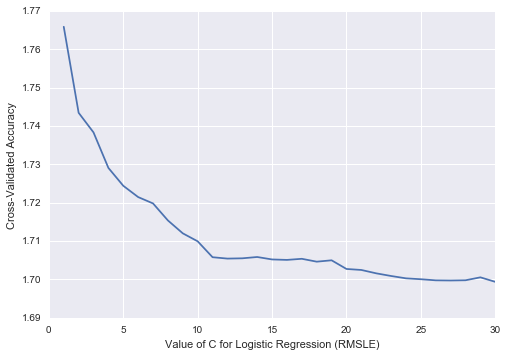

In [19]:
start = time.time()

model = LogisticRegression()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring=score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of C for Logistic Regression (RMSLE)')
plt.ylabel('Cross-Validated Accuracy')

end = time.time()
logi_time = end - start
print "duration: %fs" % (logi_time)

In [20]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

1.76584845674
{'C': 1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)


#### scoring method - RMSE

{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'C': 1}
[ 280.5234741   241.7602073   198.99034666  174.94954522  159.14298802
  155.64540354  145.03852609  132.51587603  123.99644981  117.17587694]
183.793452055
[183.79345205538931, 185.67074541579962, 187.44383511879505, 187.76280328344842, 187.64588912394771, 1

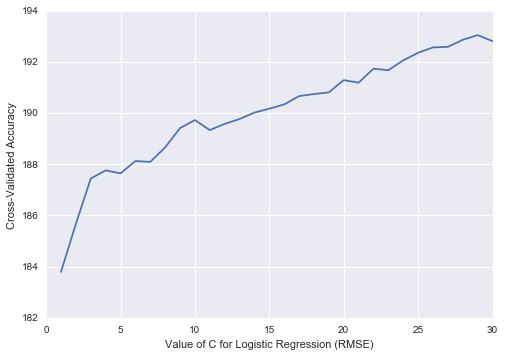

In [21]:
start = time.time()

model = LogisticRegression()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring=rmse_score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of C for Logistic Regression (RMSE)')
plt.ylabel('Cross-Validated Accuracy')

end = time.time()
logi_time = end - start
print "duration: %fs" % (logi_time)

In [22]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

193.051807732
{'C': 29}
LogisticRegression(C=29, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)


### tuning max_depth for Classification Tree

#### use scoring method - 'accuracy'

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'max_depth': 1}
[ 0.01228184  0.01587302  0.01747419  0.01807229  0.01685393  0.0186824
  0.01793249  0.0235426   0.02415459  0.02439024]
0.0181884989895
[0.018188498989527836, 0.016351276869373509, 0.021128054381774758, 0.020025721109682159, 0.022230

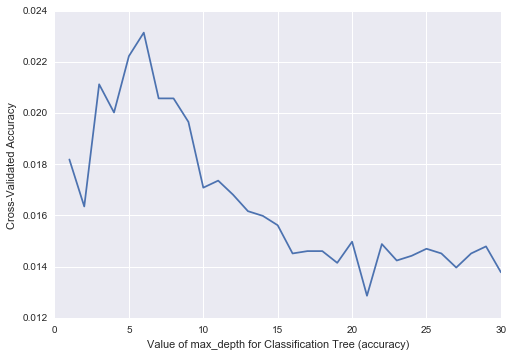

In [23]:
start = time.time()

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of max_depth for Classification Tree (accuracy)')
plt.ylabel('Cross-Validated Accuracy')

end = time.time()
tree_time = end - start
print "duration: %fs" % (tree_time)

In [24]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.0231489987139
{'max_depth': 6}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')


#### use scoring method - RMSLE

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'max_depth': 1}
[ 1.51529802  1.40660251  1.36186073  1.34612728  1.30835059  1.27342079
  1.27555095  1.32353196  1.40349992  1.33540985]
1.36478798954
[1.3647879895395867, 1.0185907411508281, 0.99878022800644972, 0.938929493385

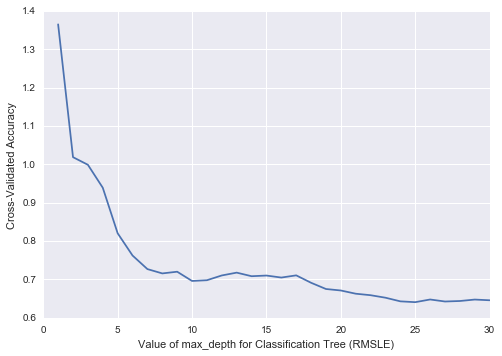

In [25]:
start = time.time()

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring=score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of max_depth for Classification Tree (RMSLE)')
plt.ylabel('Cross-Validated Accuracy')

end = time.time()
tree_time = end - start
print "duration: %fs" % (tree_time)

In [26]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

1.36478798954
{'max_depth': 1}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')


### scoring method - RMSE

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'max_depth': 1}
[ 327.23757305  271.4461113   233.87596762  211.04563259  187.90291042
  179.70860824  161.99156096  148.28007979  136.52026888  126.74075711]
211.573886678
[211.5738866781515, 167.17215624208438, 165.30063847403716, 157.97839941107819, 152.96871975411827, 145.5610647763308, 135.2702382351482

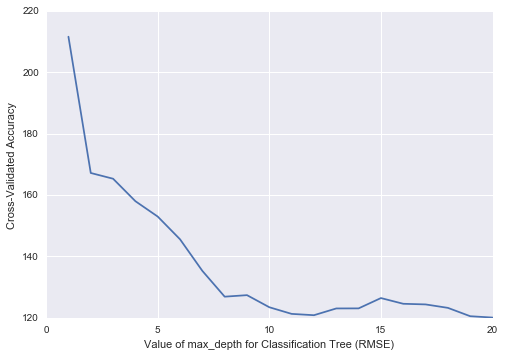

In [27]:
start = time.time()

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 21)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring=rmse_score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of max_depth for Classification Tree (RMSE)')
plt.ylabel('Cross-Validated Accuracy')

end = time.time()
tree_time = end - start
print "duration: %fs" % (tree_time)

In [28]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

211.573886678
{'max_depth': 1}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')


### tuning n_estimators for Random Forest¶

#### use scoring method - 'accuracy'

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'n_estimators': 1}
[ 0.01098901  0.01298701  0.02382844  0.01032702  0.01404494  0.01179941
  0.00632911  0.02017937  0.02536232  0.01540436]
0.014

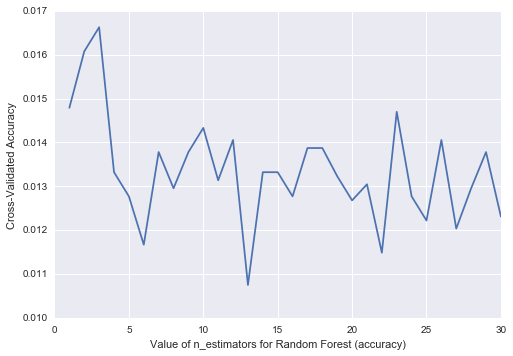

In [29]:
start = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of n_estimators for Random Forest (accuracy)')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
forest_time = end - start
print "duration: %fs" % (forest_time)

In [30]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.0166268601874
{'n_estimators': 3}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


#### use scoring method - RMSLE

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'n_estimators': 1}
[ 0.8897856   0.71949159  0.82133795  0.72797866  0.81897964  0.74894185
  0.79848447  0.79070325  0.65613

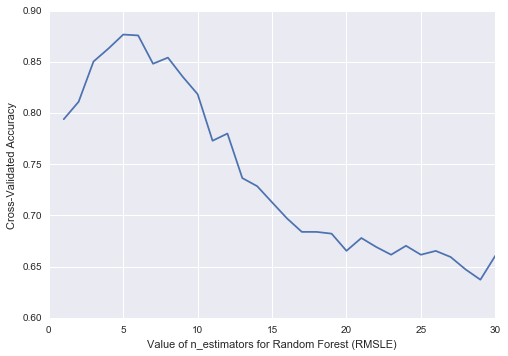

In [31]:
start = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring=score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of n_estimators for Random Forest (RMSLE)')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
forest_time = end - start
print "duration: %fs" % (forest_time)

In [32]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.876853288932
{'n_estimators': 5}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


#### scoring method - RMSE

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'n_estimators': 1}
[ 179.31975896  152.10936058  144.62085953  135.93745081  122.55246908
  133.43637243  125.78467218  112.9

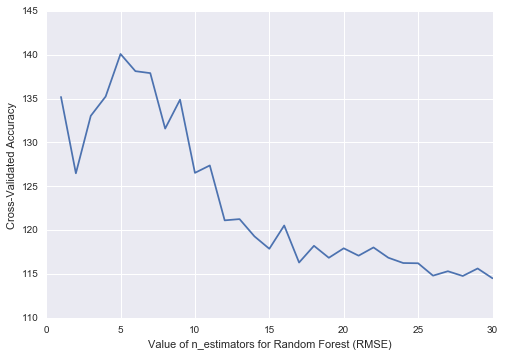

In [33]:
start = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring=rmse_score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of n_estimators for Random Forest (RMSE)')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
forest_time = end - start
print "duration: %fs" % (forest_time)

In [34]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

140.081756409
{'n_estimators': 5}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### tuning n_estimators for Boosted Trees

#### use scoring method - 'accuracy'

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'n_estimators': 1}
[ 0.01228184  0.01587302  0.01747419  0.01807229  0.01685393  0.0186824
  0.01793249  0.0235426   0.02415459  0.02439024]
0.0181884989895
[0.018188498989527836, 0.01625941576336579, 0.015616388021311777, 0.01552452691530406, 0.015340804703288628, 0.01552452691530406, 0.014973360279257763, 0.014697776961234614, 0.014973360279257763, 0.014697776961234614, 0.0

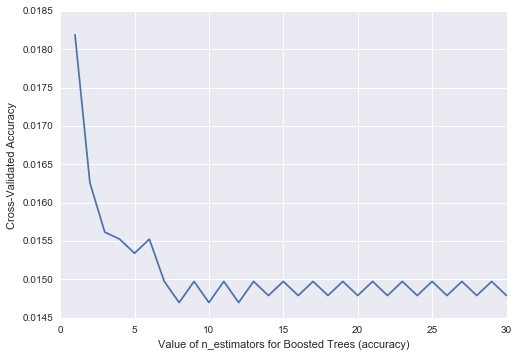

In [35]:
start = time.time()

model = AdaBoostClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of n_estimators for Boosted Trees (accuracy)')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
boost_time = end - start
print "duration: %fs" % (boost_time)

In [36]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.0181884989895
{'n_estimators': 1}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1, random_state=None)


#### use scoring method - RMSLE

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'n_estimators': 1}
[ 1.51529802  1.40660251  1.36186073  1.34612728  1.30835059  1.27342079
  1.27555095  1.32353196  1.40349992  1.33540985]
1.36478798954
[1.3647879895395867, 1.1738114753694564, 1.0673736612507967, 1.1262092546518121, 1.1643231320559653, 1.1307754962971481, 1.1535263806477076, 1.1231233074971321, 1.1560507122179433, 1.1231233074971321,

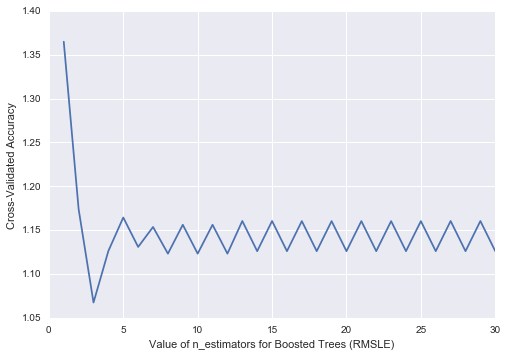

In [37]:
start = time.time()

model = AdaBoostClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring=score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of n_estimators for Boosted Trees (RMSLE)')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
boost_time = end - start
print "duration: %fs" % (boost_time)

In [38]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

1.36478798954
{'n_estimators': 1}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1, random_state=None)


#### use scoring method - RMSE

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'n_estimators': 1}
[ 327.23757305  271.4461113   233.87596762  211.04563259  187.90291042
  179.70860824  161.99156096  148.28007979  136.52026888  126.74075711]
211.573886678
[211.5738866781515, 185.29949577149847, 166.97335539261402, 171.09130792429781, 170.87833153800412, 172.58884979921416, 170.02157183818744, 171.45709128443559, 170.24149538453912, 

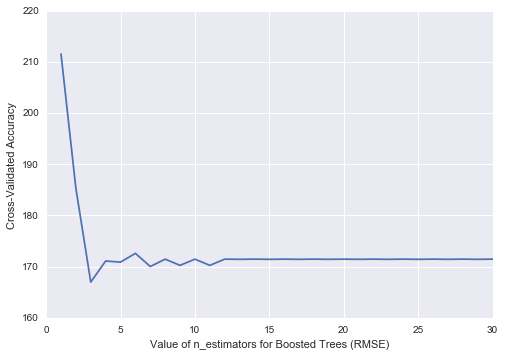

In [39]:
start = time.time()

model = AdaBoostClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring=rmse_score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of n_estimators for Boosted Trees (RMSE)')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
boost_time = end - start
print "duration: %fs" % (boost_time)

In [40]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

211.573886678
{'n_estimators': 1}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1, random_state=None)


# Feature selection

## Feature ranking with recursive feature elimination (rfe)

In [11]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
# Selected (i.e., estimated best) features are assigned rank 1
print(rfe.ranking_)

[False False False  True  True  True False False False]
[2 3 7 1 1 1 5 6 4]


The selected features are: 'weather', 'holiday', and 'workingday'.

## Lasso

In [133]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
X_new

array([[  0.   ,  14.395,  81.   ],
       [  1.   ,  13.635,  80.   ],
       [  2.   ,  13.635,  80.   ],
       ..., 
       [ 21.   ,  15.91 ,  61.   ],
       [ 22.   ,  17.425,  61.   ],
       [ 23.   ,  16.665,  66.   ]])

In [134]:
X.head()

,month,day,hour,weather,holiday,workingday,atemp,humidity,windspeed
0,1,1,0,1,0,0,14.395,81,0
1,1,1,1,1,0,0,13.635,80,0
2,1,1,2,1,0,0,13.635,80,0
3,1,1,3,1,0,0,14.395,75,0
4,1,1,4,1,0,0,14.395,75,0


The selected features are: 'hour', 'atemp', and 'humidity'.

In [41]:
df = df[['label','count', 'casual', 'registered', 'month', 'day', 'hour', 'atemp', 'humidity', 'weather', 'holiday', 'workingday', 'windspeed', 'feeltemp']]
# Use the selected features as the X
X = df.loc[:,"hour":"humidity"]
y = df["count"]
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

## Model hyper-parameters optimization

### tuning n_neighbor for KNN

#### use scoring method - 'accuracy'

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'n_neighbors': 1}
[ 0.00646412  0.00505051  0.00873709  0.01204819  0.0159176   0.01474926
  0.01793249  0.01569507  0.01570048  0.01925546]
0.012217527099
[0.012217527099026272, 0.01726988792945067, 0.017821054565496968, 0.016626860187396657, 0.015065221385265479, 0.014330332537203748, 0.013871027007165167, 0.013503582583134301, 0.01377916590115745, 0.01423847

C:\Users\Ensheng\Anaconda\lib\site-packages\sklearn\cross_validation.py:417: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


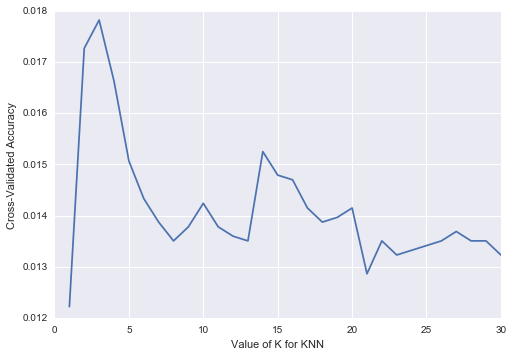

In [14]:
# use scoring method - 'accuracy'
start = time.time()
# define the parameter values that should be searched
knn = KNeighborsClassifier()
k_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
knn_time = end - start
print "duration: %f" % (knn_time)

In [15]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.0178210545655
{'n_neighbors': 3}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')


In [18]:
# 10-fold cross-validation with K=18 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=3)
scores0 = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
scores1 = cross_val_score(knn, X, y, cv=10, scoring=score)
scores2 = cross_val_score(knn, X, y, cv=10, scoring=rmse_score)
print scores0.mean()
print scores1.mean()
print scores2.mean()

0.018702289461
1.02755983071
137.462906129


#### use scoring method - RMSLE

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'n_neighbors': 1}
[ 0.94183345  0.83859391  0.86290454  0.88663409  0.8799749   0.89280415
  0.94060973  0.94825235  0.9581773   1.06671489]
0.913618315397
[0.91361831539655092, 0.93077252917463016, 1.008279854687935, 1.0766360083141466, 1.1402374843999468, 1.1835238747794345, 1.2143671407077625, 1.2433573452799664, 1.2683191174190802, 1.2

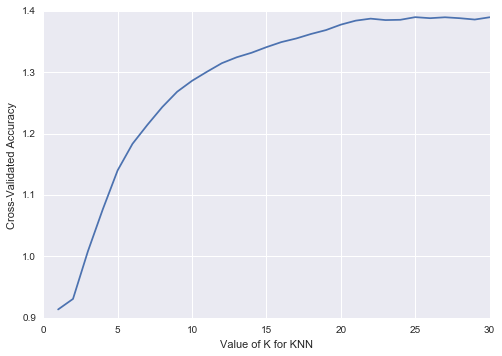

In [21]:
# use different scoring method - RMSLE
start = time.time()
# define the parameter values that should be searched
knn = KNeighborsClassifier()
k_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring=score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
knn_time = end - start
print "duration: %f" % (knn_time)

In [23]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

1.38981563309
{'n_neighbors': 25}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=25, p=2, weights='uniform')


In [27]:
# 10-fold cross-validation with K=25 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=25)
scores1 = cross_val_score(knn, X, y, cv=10, scoring=score)
scores2 = cross_val_score(knn, X, y, cv=10, scoring=rmse_score)
print scores1.mean()
print scores2.mean()

1.40312271932
165.279159255


#### scoring method - RMSE

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'n_neighbors': 1}
[ 196.83783632  166.73593149  166.02073614  154.54852632  137.30109208
  136.09564859  122.04223866  122.69234922  110.94493673  109.86687007]
148.065661064
[148.06566106359048, 139.33651929325737, 144.88936553235098, 151.97272662956786, 157.80551437753701, 161.80314679702673, 165.26107912611101, 168.0709923629399, 170.48

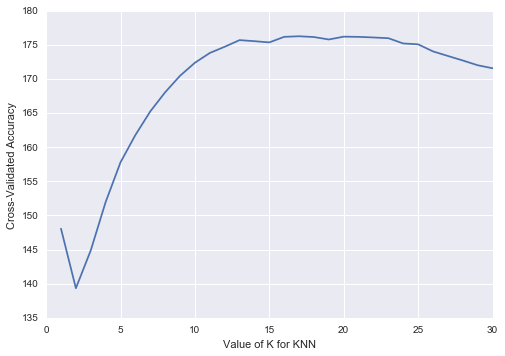

In [24]:
start = time.time()
# define the parameter values that should be searched
knn = KNeighborsClassifier()
k_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring=rmse_score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
knn_time = end - start
print "duration: %f" % (knn_time)

In [25]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

176.281439959
{'n_neighbors': 17}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=17, p=2, weights='uniform')


In [28]:
# 10-fold cross-validation with K=17 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=17)
scores2 = cross_val_score(knn, X, y, cv=10, scoring=rmse_score)
print scores2.mean()

166.380145189


### tuning C for Logistic Regression

In [29]:
lg = LogisticRegression()
scores = cross_val_score(lg, X_train, y_train, cv=10, scoring='accuracy')
print scores

[ 0.01266825  0.00926784  0.01644399  0.01465614  0.01602959  0.02173913
  0.02514793  0.02893891  0.0137457   0.03364486]


In [32]:
# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()

0.0192282346321


#### use scoring method - accuracy

{'C': 1}
[ 0.01163542  0.02092352  0.02859412  0.02151463  0.01685393  0.01179941
  0.01898734  0.03139013  0.02777778  0.01540436]
0.0201175822157
[0.020117582215689878, 0.020025721109682159, 0.01956641557964358, 0.01956641557964358, 0.019658276685651295, 0.019474554473635861, 0.019474554473635861, 0.019474554473635861, 0.019290832261620431, 0.019290832261620431, 0.019290832261620431, 0.019198971155612712, 0.019198971155612712, 0.019290832261620431, 0.019290832261620431, 0.019290832261620431, 0.019290832261620431, 0.019198971155612712, 0.019015248943597282, 0.019015248943597282, 0.019107110049604997, 0.019107110049604997, 0.019107110049604997, 0.019015248943597282, 0.018923387837589564, 0.018923387837589564, 0.018923387837589564, 0.018923387837589564, 0.018923387837589564, 0.019015248943597282]
duration: 6587.324000


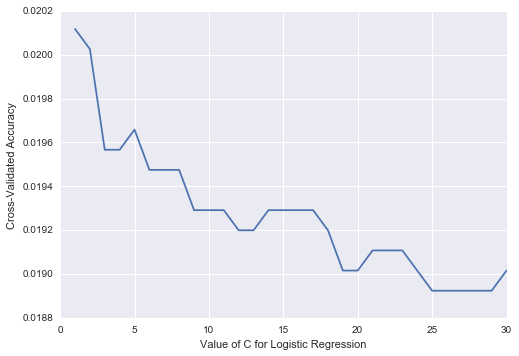

In [36]:
start = time.time()

model = LogisticRegression()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of C for Logistic Regression')
plt.ylabel('Cross-Validated Accuracy')

end = time.time()
logi_time = end - start
print "duration: %f" % (logi_time)

In [31]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.0201175822157
{'C': 1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)


In [37]:
lg = LogisticRegression(C=1)
scores = cross_val_score(lg, X_train, y_train, cv=10, scoring='accuracy')
print scores
print scores.mean()

[ 0.01266825  0.00926784  0.01644399  0.01465614  0.01602959  0.02173913
  0.02514793  0.02893891  0.0137457   0.03364486]
0.0192282346321


#### use scoring method - RMSLE

{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'C': 1}
[ 2.0378148   1.92347707  1.89816407  1.89163986  1.89492906  1.79434087
  1.86414943  1.89379129  1.8636604   2.03328981]
1.91424405312
[1.9142440531176015, 1.9124824488308472, 1.9094129313803434, 1.9080956900405079, 1.9082772409293749, 1.909850189045166, 1.

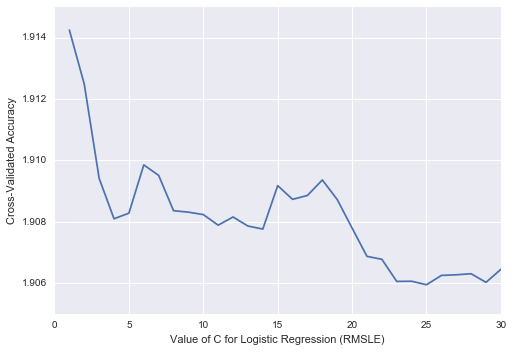

In [41]:
start = time.time()

model = LogisticRegression()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring=score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of C for Logistic Regression (RMSLE)')
plt.ylabel('Cross-Validated Accuracy')

end = time.time()
logi_time = end - start
print "duration: %fs" % (logi_time)

In [42]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

1.91424405312
{'C': 1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)


In [43]:
lg = LogisticRegression(C=1)
scores = cross_val_score(lg, X_train, y_train, cv=10, scoring=score)
print scores
print scores.mean()

[ 2.05252796  1.97443865  1.92842583  1.87086047  1.91379533  1.88178518
  1.81252798  1.94605284  1.73236045  1.76375115]
1.88765258412


#### scoring method - RMSE

{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'C': 1}
[ 281.5438932   238.21606263  204.92980065  183.86690024  159.92881434
  150.36015432  144.66976435  136.42238139  128.96146861  127.31683967]
186.100651136
[186.10065113619947, 184.55382521296886, 184.14165777781395, 183.99386366742019, 183.85704517233884, 1

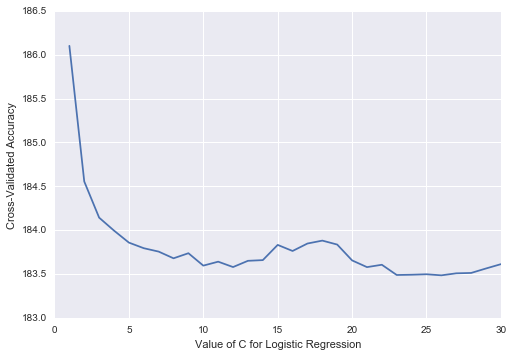

In [38]:
start = time.time()

model = LogisticRegression()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring=rmse_score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of C for Logistic Regression')
plt.ylabel('Cross-Validated Accuracy')

end = time.time()
logi_time = end - start
print "duration: %fs" % (logi_time)

In [39]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

186.100651136
{'C': 1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)


In [40]:
lg = LogisticRegression(C=1)
scores = cross_val_score(lg, X_train, y_train, cv=10, scoring=rmse_score)
print scores
print scores.mean()

[ 304.48295023  231.22766606  200.49181052  179.72743989  163.18351081
  148.00093181  134.386894    129.33816192  117.86830119  111.87972514]
172.058739156


### tuning max_depth for Classification Tree

#### use scoring method - accuracy

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'max_depth': 1}
[ 0.01228184  0.01587302  0.01747419  0.01807229  0.01685393  0.0186824
  0.01793249  0.0235426   0.02415459  0.02439024]
0.0181884989895
[0.018188498989527836, 0.018188498989527836, 0.019107110049604997, 0.019841998897666729, 0.018096637883520117, 0.01726988792945067, 0.020301304427705308, 0.019107110049604997, 0

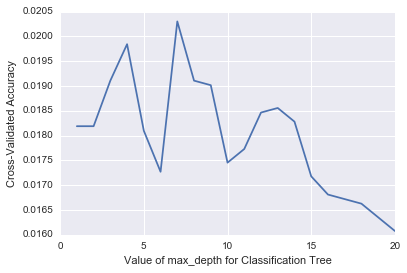

In [24]:
start = time.time()

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 21)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of max_depth for Classification Tree')
plt.ylabel('Cross-Validated Accuracy')

end = time.time()
tree_time = end - start
print "duration: %fs" % (tree_time)

In [25]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.0203013044277
{'max_depth': 7}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')


#### use scoring method - RMSLE

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'max_depth': 1}
[ 1.51529802  1.40660251  1.36186073  1.34612728  1.30835059  1.27342079
  1.27555095  1.32353196  1.40349992  1.33540985]
1.36478798954
[1.3647879895395867, 0.9681102411351501, 1.0012388035287854, 0.97903986026751566, 0.94697583773296323, 0.92431812269323943, 0.94817819395952718, 0.964972410

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:417: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


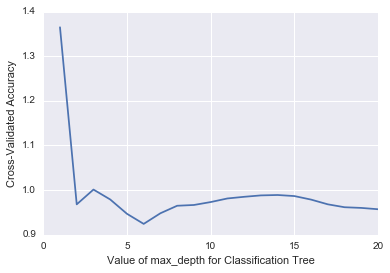

In [20]:
start = time.time()

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 21)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring=score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of max_depth for Classification Tree')
plt.ylabel('Cross-Validated Accuracy')

end = time.time()
tree_time = end - start
print "duration: %fs" % (tree_time)

In [21]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

1.36478798954
{'max_depth': 1}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')


#### scoring method - RMSE

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'max_depth': 1}
[ 327.23757305  271.4461113   233.87596762  211.04563259  187.90291042
  179.70860824  161.99156096  148.28007979  136.52026888  126.74075711]
211.573886678
[211.5738866781515, 169.14299041572619, 163.72797868063338, 157.71749284060252, 147.58806060322743, 142.75504447339631, 143.024518402380

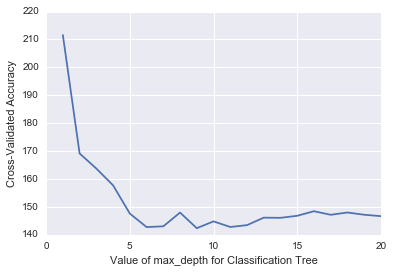

In [22]:
start = time.time()

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 21)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring=rmse_score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of max_depth for Classification Tree')
plt.ylabel('Cross-Validated Accuracy')

end = time.time()
tree_time = end - start
print "duration: %fs" % (tree_time)

In [23]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

211.573886678
{'max_depth': 1}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')


### tuning n_estimators for Random Forest

#### use scoring method - accuracy

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'n_estimators': 1}
[ 0.00840336  0.00865801  0.01747419  0.02151463  0.01498127  0.01179941
  0.01160338  0.02017937  0.01328502  0.02053915]
0.014

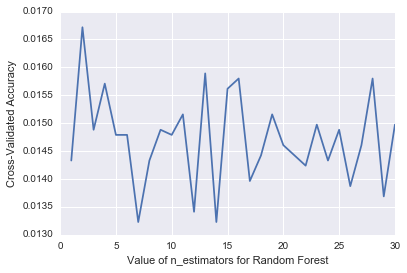

In [27]:
start = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of n_estimators for Random Forest')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
forest_time = end - start
print "duration: %fs" % (forest_time)

In [28]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.0167187212934
{'n_estimators': 2}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


#### use scoring method - RMSLE

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'n_estimators': 1}
[ 0.94438055  0.9126328   0.87689704  0.92547711  0.92710379  0.92920458
  0.92997116  0.94727669  0.97509

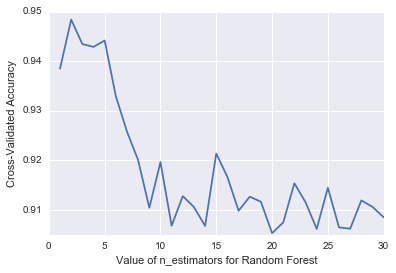

In [29]:
start = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring=score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of n_estimators for Random Forest')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
forest_time = end - start
print "duration: %fs" % (forest_time)

In [30]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.948382145304
{'n_estimators': 2}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


#### scoring method - RMSE

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'n_estimators': 1}
[ 200.20604448  177.84064928  168.16830567  163.92130842  141.3720786
  133.97428172  123.05840608  121.22

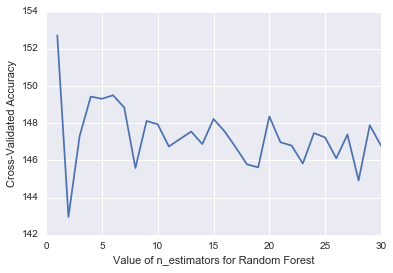

In [31]:
start = time.time()
model = RandomForestClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring=rmse_score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of n_estimators for Random Forest')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
forest_time = end - start
print "duration: %fs" % (forest_time)

In [32]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

152.718192898
{'n_estimators': 1}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


### tuning n_estimators for Boosted Trees

#### use scoring method - accuracy

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)
{'n_estimators': 1}
[ 0.01228184  0.01587302  0.01747419  0.01807229  0.01685393  0.0186824
  0.01793249  0.0235426   0.02415459  0.02439024]
0.0181884989895
[0.018188498989527836, 0.01625941576336579, 0.015708249127319492, 0.01552452691530406, 0.015157082491273195, 0.01552452691530406, 0.014789638067242329, 0.014697776961234614, 0.014789638067242329, 0.014697776961234614, 0.0

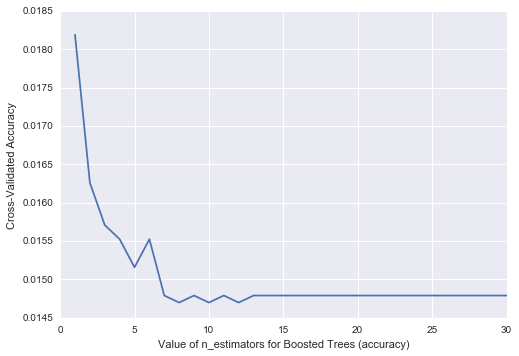

In [42]:
start = time.time()

model = AdaBoostClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of n_estimators for Boosted Trees (accuracy)')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
boost_time = end - start
print "duration: %fs" % (boost_time)

In [43]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.0181884989895
{'n_estimators': 1}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1, random_state=None)


#### use scoring method - RMSLE

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'n_estimators': 1}
[ 1.51529802  1.40660251  1.36186073  1.34612728  1.30835059  1.27342079
  1.27555095  1.32353196  1.40349992  1.33540985]
1.36478798954
[1.3647879895395867, 1.1738114753694564, 1.0673736612507967, 1.1262092546518121, 1.1648564926930605, 1.1310665661958961, 1.1540597412848028, 1.1236328504532955, 1.1565840728550383, 1.1236328504532955,

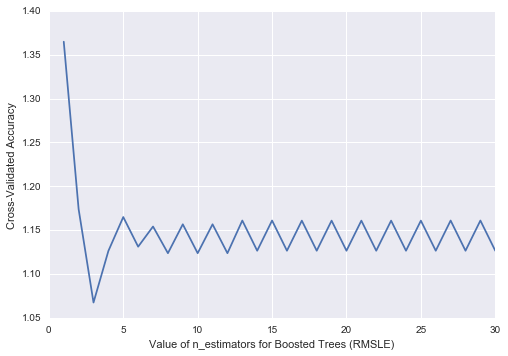

In [44]:
start = time.time()

model = AdaBoostClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring=score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of n_estimators for Boosted Trees (RMSLE)')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
boost_time = end - start
print "duration: %fs" % (boost_time)

In [45]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

1.36478798954
{'n_estimators': 1}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1, random_state=None)


#### scoring method - RMSE

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring=make_scorer(my_custom_loss_func), verbose=0)
{'n_estimators': 1}
[ 327.23757305  271.4461113   233.87596762  211.04563259  187.90291042
  179.70860824  161.99156096  148.28007979  136.52026888  126.74075711]
211.573886678
[211.5738866781515, 185.29949577149847, 167.87459885917329, 171.09130792429781, 170.87467205075828, 172.58408282480855, 170.01791235094166, 171.45342866066207, 170.23783589729334, 

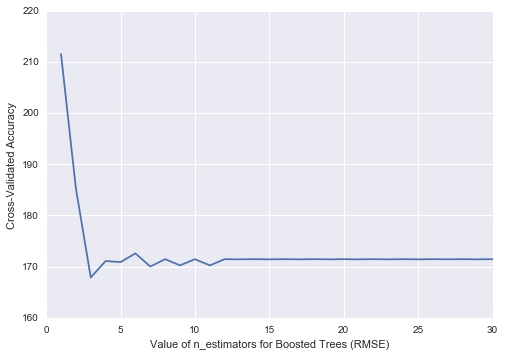

In [46]:
start = time.time()

model = AdaBoostClassifier()
model.fit(X_train, y_train)
# define the parameter values that should be searched
test_range = range(1, 31)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=test_range)
print param_grid
# instantiate the grid
grid = GridSearchCV(model, param_grid, cv=10, scoring=rmse_score)
# fit the grid with data
print grid.fit(X, y)
# view the complete results (list of named tuples)
grid.grid_scores_
# examine the first tuple
print grid.grid_scores_[0].parameters
print grid.grid_scores_[0].cv_validation_scores
print grid.grid_scores_[0].mean_validation_score
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print grid_mean_scores
# plot the results
plt.plot(test_range, grid_mean_scores)
plt.xlabel('Value of n_estimators for Boosted Trees (RMSE)')
plt.ylabel('Cross-Validated Accuracy')
end = time.time()
boost_time = end - start
print "duration: %fs" % (boost_time)

In [47]:
# examine the best model
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

211.573886678
{'n_estimators': 1}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1, random_state=None)


# Conclusion

In [49]:
summary = pd.read_csv('summary.csv')
summary

,Factors,Models,Tuning Parameter,Best Values (default),Best Values (RMSLE),Best Values (RMSE),10 CV Accuracy (default),10 CV Accuracy (RMSLE),10 CV Accuracy (RMSE),Tuning Time (s) (default),Tuning Time (s) (RMSLE),Tuning Time (s) (RMSE)
0,All factors,KNN,n_neighbors,10,18,17,0.013412,1.687081,185.698687,34.236,34.125,34.013
1,All factors,Logistic Regression,C,1,1,29,0.016351,1.765848,193.051808,22015.745,22001.158,22198.225
2,All factors,Classification Tree,max_depth,6,1,1,0.023149,1.364788,211.573887,70.016,70.231,28.295
3,All factors,Bagging,n_neighbors,10,18,17,0.013412,1.687081,185.698687,34.236,34.125,34.013
4,All factors,Random forest,n_estimators,3,5,5,0.016627,0.876853,140.081756,818.651,839.794,850.417
5,All factors,Boosted Trees,n_estimators,1,1,1,0.018188,1.364788,211.573887,1510.984,1509.256,1511.459
6,Selected factors,KNN,n_neighbors,3,25,17,0.017821,1.389816,176.281440,25.101,24.712,24.713
7,Selected factors,Logistic Regression,C,1,1,1,0.020118,1.914244,186.100651,6587.324,6520.286,6542.044
8,Selected factors,Classification Tree,max_depth,7,1,1,0.020301,1.364788,211.573887,16.227,15.989,15.914
9,Selected factors,Bagging,n_neighbors,3,25,17,0.017821,1.389816,176.281440,25.101,24.712,24.713


### 10 CV Accuracy Comparison

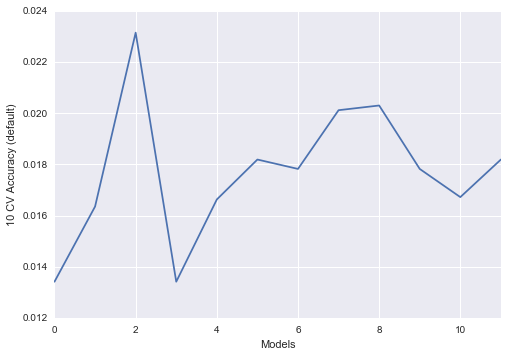

In [57]:
summary.loc[:,"10 CV Accuracy (default)"].plot()
plt.xlabel('Models')
plt.ylabel('10 CV Accuracy (default)')

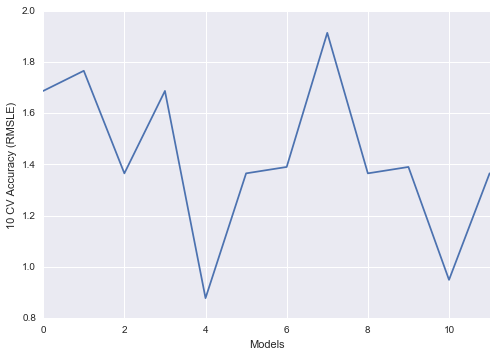

In [58]:
summary.loc[:,"10 CV Accuracy (RMSLE)"].plot()
plt.xlabel('Models')
plt.ylabel('10 CV Accuracy (RMSLE)')

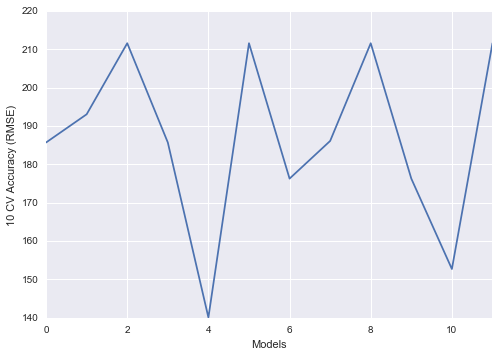

In [59]:
summary.loc[:,"10 CV Accuracy (RMSE)"].plot()
plt.xlabel('Models')
plt.ylabel('10 CV Accuracy (RMSE)')

### Tuning Time Comparison

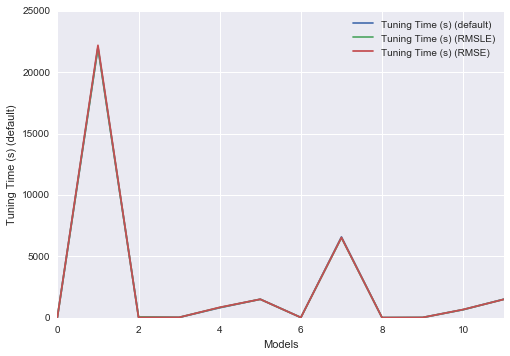

In [61]:
summary.loc[:,"Tuning Time (s) (default)":"Tuning Time (s) (RMSE)"].plot()
plt.xlabel('Models')
plt.ylabel('Tuning Time (s) (default)')

### Feature Importance (for Random Forest)

In [67]:
df = df[['label','count', 'casual', 'registered', 'month', 'day', 'hour', 'weather', 'holiday', 'workingday', 'atemp', 'humidity', 'windspeed', 'feeltemp']]
# Use the selected features as the X
X = df.loc[:,"month":"windspeed"]
y = df["count"]
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [68]:
# feature importance for random forest
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X, y)
rfscore_mean = cross_val_score(rf, X, y, cv=10, scoring='accuracy').mean()
rfscore_mean

0.016369720269564462

In [69]:
rf.feature_importances_

array([ 0.09395972,  0.15224006,  0.17156854,  0.0462185 ,  0.00594327,
        0.01589059,  0.16477374,  0.18347506,  0.16593052])

'humidity' and 'hour' are the top two important factors.

### Summary

Twelve models were examized in this project, and they were categorized into two scenarios: one with all factors, one with three selected factors ('hour', 'atemp', and 'humidity'). We first tuned parameters for each model, and then calculated their running time and 10-CV accuracy.

Since our response variable is continous, we did not have a chance to test the naive bayes method, and ROC / AUC comparison. The process time to test SVM is beyond the scope of a reasonable study, we therefore did not test this method either.

We found that even in the same model and tuning the same hyper-parameter, if we used different evaluation method, the result would be very different. For instance, the best C for logistic regression model was 1 for the default and RMSLE methods, while 29 for RMSE method. The n_estimators for the random forest was 3 for the default method, and 5 for both RMSLE and RMSE methods.

Comparing the 10 fold cross-validation results, we can find that when using the default estimation, the classification tree is the best method; when using the Root Mean Squared Logarithmic Error (RMSLE) and the Root Mean Squared Error (RMSE), the random forest is the best method. When comparing the time spending in tuning parameters, three different evaluation methods showed a similar time duration, and the Logistic Regression model took the longest time to test the 10 CV. 

Generally speaking, random forest is by far the best method in predicting the bike rental demand.

# Future Study

Here are some possible future tasks for this project:
* memit - to calculate the memory spent by a certain process.
* Time series
* Location analysis
* Feature selection
* Continue the Noisy Replications Ensembling
* Unsupervised methods